In [1]:
# from pandas_profiling import ProfileReport as pr
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'ds_salaries.csv')

In [3]:
# pr(df)

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
df.shape

(607, 11)

In [7]:
df['work_year'].unique()

array([2020, 2021, 2022], dtype=int64)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


# Preprocessing

In [9]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [10]:
df.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

The Meaning of the Values are as follows:

- EN Entry-level / Junior 
- MI Mid-level / Intermediate 
- SE Senior-level / Expert 
- EX Executive-level / Director"			

In [11]:
df.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

The Meaning of the Values are as follows:

- PT Part-time 
- FT Full-time 
- CT Contract 
- FL Freelance

In [12]:
df['work_year'].unique()

array([2020, 2021, 2022], dtype=int64)

# Exploratory Data Analysis

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1

In [14]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

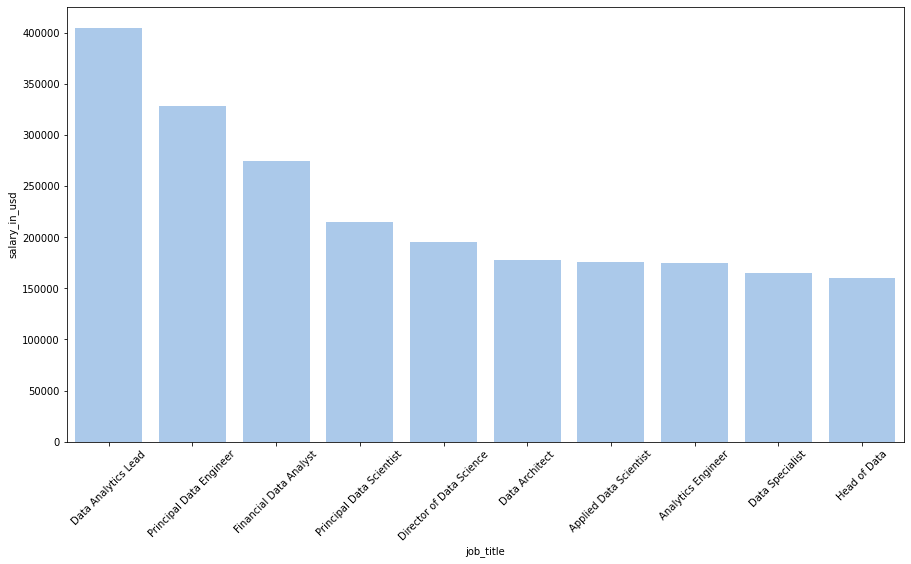

In [15]:
temp = df.groupby(['job_title'])['salary_in_usd'].mean().reset_index().sort_values('salary_in_usd',
                                                                                   ascending=False).head(10)

f, ax = plt.subplots(figsize=(15, 8))
sns.set_color_codes("pastel")
sns.barplot(x='job_title',y='salary_in_usd',data=temp,color='b')
plt.xticks(rotation=45)
plt.show()

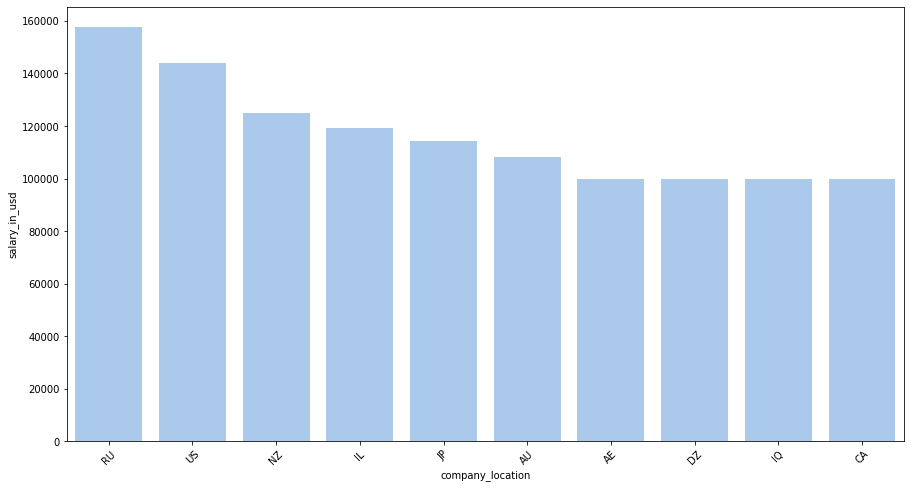

In [16]:
temp_2 = df.groupby(['company_location'])['salary_in_usd'].mean().reset_index().sort_values('salary_in_usd',
                                                                                   ascending=False).head(10)

f, ax = plt.subplots(figsize=(15, 8))
sns.set_color_codes("pastel")
sns.barplot(x='company_location',y='salary_in_usd',data=temp_2,color='b')
plt.xticks(rotation=45)
plt.show()

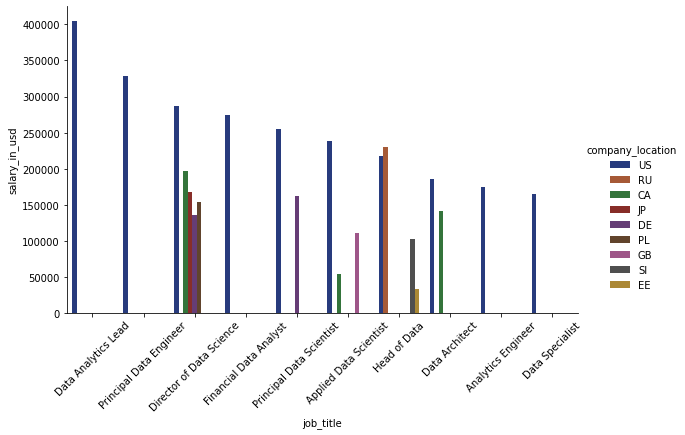

In [17]:
temp_3 = df.groupby(['job_title','company_location'])['salary_in_usd'].mean().reset_index().sort_values('salary_in_usd',
                                                                                                        ascending=False)
temp_4 = temp_3.loc[(temp_3.job_title.isin(temp['job_title'].unique()))]
#            & (temp_3.company_location.isin([temp_2['company_location'].unique()]))]

# sns.set_color_codes("pastel")
# sns.catplot(x='job_title',y='salary_in_usd',data=temp_3,hue='company_location',color='b')
# sns.catplot(
#     data=penguins, kind="bar",
#     x="species", y="body_mass_g", hue="sex",
#     errorbar="sd", palette="dark", alpha=.6, height=6
# )


sns.catplot(
    data=temp_4, kind="bar",
    x="job_title", y="salary_in_usd", hue="company_location", palette="dark", alpha=.9, height=5, aspect=50/30
)
plt.xticks(rotation=45)
plt.show()
# g.despine(left=True)
# g.set_axis_labels("", "Salary in USD")
# g.legend.set_title("")





### 2

In [18]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

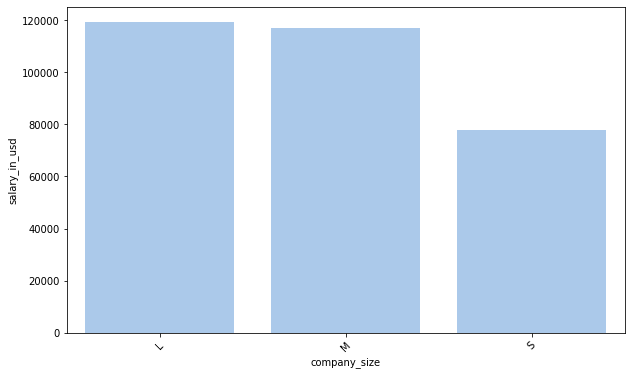

In [19]:
temp = df.groupby(['company_size'])['salary_in_usd'].mean().reset_index().sort_values('salary_in_usd',ascending=False)

f, ax = plt.subplots(figsize=(10, 6))
sns.set_color_codes("pastel")
sns.barplot(x='company_size',y='salary_in_usd',data=temp,color='b')
plt.xticks(rotation=45)
plt.show()


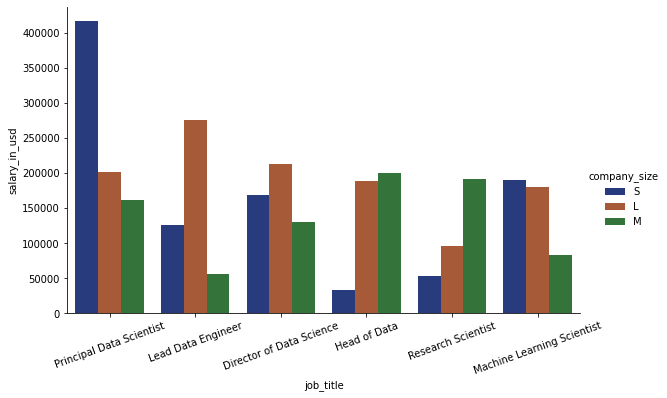

In [20]:
temp = df.groupby(['job_title','company_size'])['salary_in_usd'].mean().reset_index().sort_values('salary_in_usd',ascending=False)

dic = {}
for i in temp.job_title:
    temp_1 = len(temp.loc[temp.job_title == i,'company_size'].unique())
    dic[i] = temp_1
        

def count(x):
    return dic[x]

temp['count'] = temp['job_title'].apply(lambda x: count(x))

any5 = temp.loc[temp['count']==3,'job_title'].unique()[:6]
temp_2 = temp[temp['job_title'].isin(any5)].drop('count',axis=1)

sns.catplot(
    data=temp_2, kind="bar",
    x="job_title", y="salary_in_usd", hue="company_size", palette="dark", alpha=.9, height=5, aspect=50/30
)
plt.xticks(rotation=20)
plt.show()


## 3

In [21]:
temp = df.groupby(['job_title','work_year']).agg({'salary_in_usd':'mean'}).reset_index()
temp

,job_title,work_year,salary_in_usd
0,3D Computer Vision Researcher,2021,5409.00
1,AI Scientist,2020,45896.00
2,AI Scientist,2021,24263.25
3,AI Scientist,2022,160000.00
4,Analytics Engineer,2022,175000.00
...,...,...,...
93,Product Data Analyst,2020,13036.00
94,Research Scientist,2020,246000.00
95,Research Scientist,2021,83003.60
96,Research Scientist,2022,105569.00


In [22]:
dic = {}
for i in temp.job_title:
    temp_1 = len(temp.loc[temp.job_title == i,'work_year'].unique())
    dic[i] = temp_1
        

def Noofyears(x):
    return dic[x]

temp['no_of_years'] = temp['job_title'].apply(lambda x: Noofyears(x))
temp=temp.loc[temp['no_of_years']==3]

In [23]:
temp["job_title"].unique()

array(['AI Scientist', 'Business Data Analyst',
       'Computer Vision Engineer', 'Data Analyst', 'Data Engineer',
       'Data Science Manager', 'Data Scientist',
       'Director of Data Science', 'Lead Data Engineer', 'ML Engineer',
       'Machine Learning Engineer',
       'Machine Learning Infrastructure Engineer',
       'Machine Learning Scientist', 'Principal Data Scientist',
       'Research Scientist'], dtype=object)

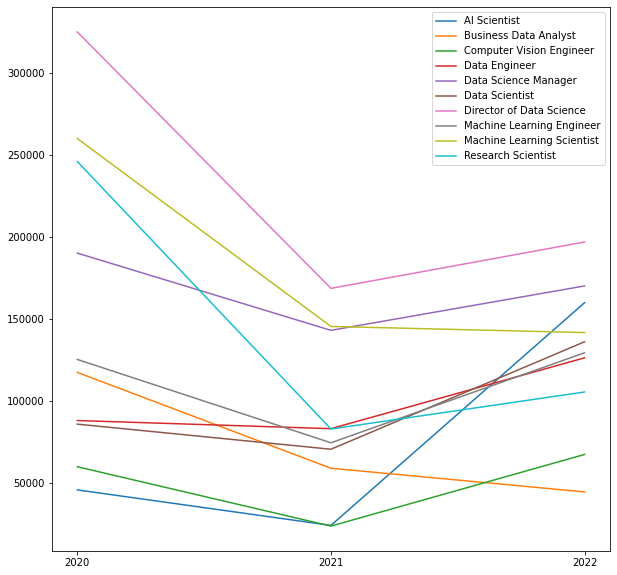

In [24]:
plt.figure(figsize=[10,10])
for i in temp["job_title"].unique():
    yarr=temp.loc[temp['job_title']== i].salary_in_usd.to_numpy()
    if yarr[1]<yarr[0]:
        plt.plot(['2020','2021','2022'],yarr , label = i)
plt.legend()
plt.show()

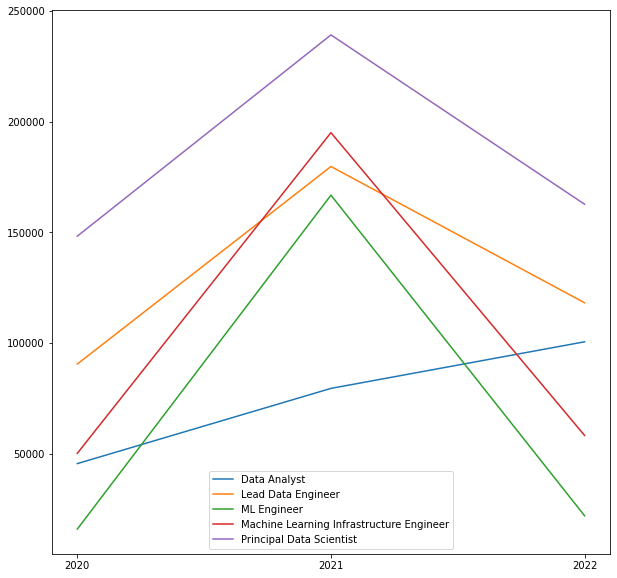

In [25]:
plt.figure(figsize=[10,10])
for i in temp["job_title"].unique():
    yarr=temp.loc[temp['job_title']== i].salary_in_usd.to_numpy()
    if yarr[1]>yarr[0]:
        plt.plot(['2020','2021','2022'],yarr , label = i)
plt.legend()
plt.show()

## EDA 4

In [26]:
temp2=df.groupby(['experience_level']).agg({'salary_in_usd':'mean'}).sort_values(by=['salary_in_usd']).reset_index()
temp2

,experience_level,salary_in_usd
0,EN,61643.318182
1,MI,87996.056338
2,SE,138617.292857
3,EX,199392.038462


No handles with labels found to put in legend.


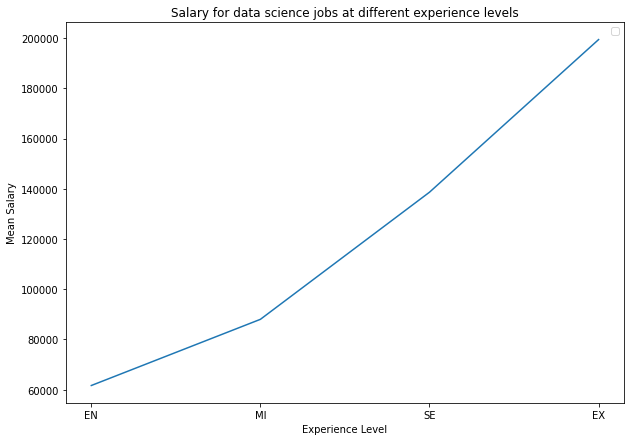

In [27]:
plt.figure(figsize=[10,7])
plt.ylabel('Mean Salary')
plt.xlabel('Experience Level')
plt.title('Salary for data science jobs at different experience levels')
plt.plot(temp2.experience_level,temp2.salary_in_usd)
plt.legend()
plt.show()

# EDA 5

In [28]:
df.salary_in_usd.describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

<AxesSubplot:ylabel='Frequency'>

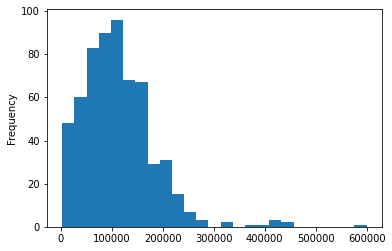

In [29]:
df['salary_in_usd'].plot(kind='hist',bins=25)

# Feature Engineering

In [30]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [31]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

In [32]:
final_df = pd.DataFrame()

# experience_level 
final_df['experience_level'] = label_encoder.fit_transform(df['experience_level'])


# employment_type 
final_df['employee_residence'] = label_encoder.fit_transform(df['employee_residence'])

# remote_ratio 
final_df['remote_ratio'] = df['remote_ratio'].astype('int')

# company_size 
a = onehot_encoder.fit_transform(df[['company_size']]).toarray()
final_df[['company_size_large','company_size_medium','company_size_small']] = pd.DataFrame(a)

# company_location 
final_df['company_location'] = label_encoder.fit_transform(df['company_location'])

final_df.head()

,experience_level,employee_residence,remote_ratio,company_size_large,company_size_medium,company_size_small,company_location
0,2,14,0,1.0,0.0,0.0,12
1,3,32,0,0.0,0.0,1.0,29
2,3,20,50,0.0,1.0,0.0,18
3,2,23,0,0.0,0.0,1.0,20
4,3,55,50,1.0,0.0,0.0,48


In [33]:
temp = df.groupby('job_title').agg({'salary_in_usd':'mean'}).reset_index()
temp = temp.append(pd.DataFrame({'job_title':'Others','salary_in_usd':temp['salary_in_usd'].mean()},index=[0])).reset_index(drop=True)
final_df['job_title'] = df['job_title']
temp.columns = ['job_title','Average_salary_for_job_titles']
final_df = final_df.merge(temp,on='job_title',how='left')
final_df.drop(['job_title'],axis=1,inplace=True)
final_df.head()

,experience_level,employee_residence,remote_ratio,company_size_large,company_size_medium,company_size_small,company_location,Average_salary_for_job_titles
0,2,14,0,1.0,0.0,0.0,12,108187.832168
1,3,32,0,0.0,0.0,1.0,29,158412.500000
2,3,20,50,0.0,1.0,0.0,18,51974.000000
3,2,23,0,0.0,0.0,1.0,20,13036.000000
4,3,55,50,1.0,0.0,0.0,48,104880.146341


In [34]:
final_df['salary'] = df['salary_in_usd']
final_df.isnull().sum()

experience_level                 0
employee_residence               0
remote_ratio                     0
company_size_large               0
company_size_medium              0
company_size_small               0
company_location                 0
Average_salary_for_job_titles    0
salary                           0
dtype: int64

In [35]:
final_df.corr()

,experience_level,employee_residence,remote_ratio,company_size_large,company_size_medium,company_size_small,company_location,Average_salary_for_job_titles,salary
experience_level,1.000000,0.226543,0.053628,-0.076332,0.230590,-0.230497,0.247133,0.100919,0.315312
employee_residence,0.226543,1.000000,0.157299,-0.025962,0.155949,-0.190902,0.897704,0.142563,0.452501
remote_ratio,0.053628,0.157299,1.000000,-0.038243,0.042989,-0.010206,0.169083,0.087209,0.132122
company_size_large,-0.076332,-0.025962,-0.038243,1.000000,-0.749422,-0.276914,-0.020801,0.141129,0.068157
company_size_medium,0.230590,0.155949,0.042989,-0.749422,1.000000,-0.428676,0.126338,-0.081930,0.069999
company_size_small,-0.230497,-0.190902,-0.010206,-0.276914,-0.428676,1.000000,-0.154971,-0.073672,-0.194593
company_location,0.247133,0.897704,0.169083,-0.020801,0.126338,-0.154971,1.000000,0.126430,0.428994
Average_salary_for_job_titles,0.100919,0.142563,0.087209,0.141129,-0.081930,-0.073672,0.126430,1.000000,0.501080
salary,0.315312,0.452501,0.132122,0.068157,0.069999,-0.194593,0.428994,0.501080,1.000000


# Building Sample model for checking accuracy

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(final_df.drop(['salary'],axis=1),final_df['salary'],
                                                    test_size=0.2,random_state=54)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((485, 8), (122, 8), (485,), (122,))

In [38]:
X_train.head()

,experience_level,employee_residence,remote_ratio,company_size_large,company_size_medium,company_size_small,company_location,Average_salary_for_job_titles
204,2,55,100,1.0,0.0,0.0,48,108187.832168
261,3,14,50,1.0,0.0,0.0,12,92893.061856
571,3,55,100,0.0,1.0,0.0,48,108187.832168
171,2,20,100,1.0,0.0,0.0,18,112725.000000
139,0,55,100,0.0,1.0,0.0,48,108187.832168


Mean-Squared-Error : 2668582993.2436314
Root-Mean-Squared-Accuracy : 51658.329369460174
Mean-Absolute-Error : 34528.930539507906


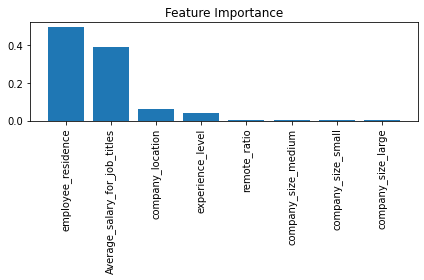

In [39]:
model = RandomForestRegressor(n_estimators=200,max_depth=3)
model.fit(X_train,Y_train)

# Checking Accuracy
predicts = model.predict(X_test)
print('Mean-Squared-Error :',mean_squared_error(Y_test,predicts,squared=True))
print('Root-Mean-Squared-Accuracy :',mean_squared_error(Y_test,predicts,squared=False))
print('Mean-Absolute-Error :',mean_absolute_error(Y_test,predicts))

importances = model.feature_importances_

sorted_indices = np.argsort(importances)[::-1]
feat_labels = X_test.columns

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices],align='center')
plt.xticks(range(X_train.shape[1]),X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [44]:
import pickle
with open(r'C:\Users\Yash\Desktop\ML_Project\api_backend\random_forest.pickle','wb') as model_file:
    pickle.dump(model,model_file)